# Sample code for the workshop


## Reading/downloading text available in various formats

# Wiki dumps for various languages

## Location of the wiki dump

Bengali -  https://dumps.wikimedia.org/bnwiki/latest/bnwiki-latest-pages-articles.xml.bz2

Hindi - https://dumps.wikimedia.org/hiwiki/latest/hiwiki-latest-pages-articles.xml.bz2

Kannada - https://dumps.wikimedia.org/knwiki/latest/knwiki-latest-pages-articles.xml.bz2

Malayalam - https://dumps.wikimedia.org/mlwiki/latest/mlwiki-latest-pages-articles.xml.bz2

Marati - https://dumps.wikimedia.org/mrwiki/latest/mrwiki-latest-pages-articles.xml.bz2

Tamil - https://dumps.wikimedia.org/tawiki/latest/tawiki-latest-pages-articles.xml.bz2

Telugu - https://dumps.wikimedia.org/tewiki/latest/tewiki-latest-pages-articles.xml.bz2

For any other language, replace the first two characters of the file name with the ISO code of that language

### Use a bz2 extractor to extract XML dump of the articles 

# use the following sample code to extract the dump

Note: Intially try with 100 articles from the dump before extracting the entire XML data set

In [1]:
# Helper code
%pip install wget
from pathlib import Path
import wget
import bz2


def get_corpus_folder():
    home = get_home_dir()
    return  home + '/Teaching/IITMDS/Corpora/'

def get_home_dir():
    return str(Path.home())    


def download_wiki(language_code, remote_url):
    print('downloading...')
    local_file = get_corpus_folder() + language_code + 'Wiki.bz2'
    wget.download(remote_url, local_file)
    print('Download Complete')
    return local_file

def download_file(language_code, remote_url):
    print('Download started')
    req = requests.get(remote_url)
 
    # Split URL to get the file name
    filename = remote_url.split('/')[-1]
    local_file = get_corpus_folder() + filename

    # Writing the file to the local file system
    with open(local_file,'wb') as output_file:
        output_file.write(req.content)
        
    print('Download Completed')
    print(local_file)
    return local_file
    
def uncompress_bz2(language_code, bz2_filename):
    print('Uncompress started')
    corpus_filename = get_corpus_folder() + language_code + 'Wiki.txt'
    with bz2.open(bz2_filename, "rb") as f:
        # Decompress data from file
        content = f.read()
        output = open(corpus_filename, 'w', encoding='utf-8')
        output.write(content.decode(encoding='utf-8'))
        f.close()
    print('Completed')
    return corpus_filename    


Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install wiki_dump_reader

from wiki_dump_reader import Cleaner, iterate
from pathlib import Path
import requests

#https://github.com/CyberZHG/wiki-dump-reader
#pip install wiki-dump-reader
#Code adapted from https://github.com/CyberZHG/wiki-dump-reader
def create_corpus_for_language(language_code):

    # corpus_file = '<your_Folder/CorpusFileName.txt'
    corpus_filename = get_corpus_folder() + language_code + 'Wiki.txt'
    page_count = 0
    cleaner = Cleaner()
    with open(corpus_filename, 'w', encoding='utf-8') as output:
       # for title, text in iterate('/LocationOfYourContent/XXwiki-latest-pages-articles.xml'):
        for title, text in iterate(get_corpus_folder() + language_code + 'wiki-latest-pages-articles.xml'):
            text = cleaner.clean_text(text)
            cleaned_text, links = cleaner.build_links(text)
            output.write(title + '\n' + cleaned_text + '\n')
            page_count += 1
            if page_count % 50 == 0:
                print('Pages dumped = ', page_count)
            # For demo purposes, the execution is stopped after 5 pages
            if page_count > 100:
                break
    output.close()


language_code = 'bn'
#local_bz2_file = download_file('bn',"https://dumps.wikimedia.org/bnwiki/latest/bnwiki-latest-pages-articles.xml.bz2")
#uncompress_bz2(language_code, local_bz2_file)
#create_corpus_for_language(language_code)
#file = open(get_corpus_folder() + language_code + 'Wiki.txt','r', encoding='utf-8')
file = open(get_corpus_folder() + 'sample.txt','r', encoding='utf-8')
file.read()

Note: you may need to restart the kernel to use updated packages.


'Viral Gene Compression: Complexity and Verification The smallest known biological organisms are, by far, the viruses. One of the unique adaptations that many viruses have aquired is the compression of the genes in their genomes. In this paper we study a formalized model of gene compression in viruses. Specifically, we define a set of constraints that describe viral gene compression strategies and investigate the properties of these constraints from the point of view of genomes as languages. We pay special attention to the finite case (representing real viral genomes) and describe a metric for measuring the level of compression in a real viral genome. An efficient algorithm for establishing this metric is given along with applications to real genomes including automated classification of viruses and prediction of horizontal gene transfer between host and virus. In contrast to the lengthy, often redundant, genomes of higher organisms, the genomes of viruses are extremely efficient in th

In [3]:
#create_corpus_for_language(language_code)

## Exrtaction of text from a json corpus
### Corpus compiled in JSON format
### JSON schema of full text documents of COVID Corpus
### This JSON formated text is extracted from PDF files

### Code for extracting text from the JSON 
### the schema is given above

In [4]:
import json


def extract_text_from_json_file(filename):
    '''
    Extract the text from the file name (json file) and
    index the content from paper_id, title, abstract and body_text fields
    Retuns - text of title, abstract and bodt_text
    '''

    file = open(filename)
    body_text = ""
    abstract = ""
    title = ""
    paper_id = ""

    paper_content = json.load(file)

    #get the paper_id
    if 'paper_id' in paper_content:
        paper_id = paper_content['paper_id']
        
    #get the title, if available
    if 'title' in paper_content['metadata']:
        title = paper_content['metadata']['title']
    #get abstract.text, if availabledef extract_text(filename):
    '''
    Extract the text from the file name (json file) and
    index the content from paper_id, title, abstract and body_text fields
    Retuns - text of title, abstract and bodt_text
    '''

    file = open(filename)
    body_text = ""
    abstract = ""
    title = ""
    paper_id = ""

    paper_content = json.load(file)

    #get the paper_id
    if 'paper_id' in paper_content:
        paper_id = paper_content['paper_id']
        
    #get the title, if available
    if 'title' in paper_content['metadata']:
        title = paper_content['metadata']['title']
    #get abstract.text, i
    if 'abstract' in paper_content:
        for abs in paper_content['abstract']:
            abstract = abstract + abs['text']
    if 'body_text' in paper_content:
        for bt in paper_content['body_text']:
            body_text = body_text + bt['text']


   
    return (title + ' ' + abstract + ' ' + body_text + ' ')

In [5]:
from base64 import decode


txt_dump = extract_text_from_json_file(get_corpus_folder()+'covid_paper_sample.json')

f = open(get_corpus_folder() + 'sample.txt', 'w',encoding='utf-8')
f.write(txt_dump)
f.close()

## Upload/read corpus 


In [6]:
# read the corpus

fd = open(get_corpus_folder() + 'covid19_partial.txt', encoding='utf-8' )
covid19_corpus = fd.read()
# Create tokens out of the corpus
import nltk
import re
import string
nltk.download('punkt')

#remove numbers
pp_text = re.sub(r'\d+', '', covid19_corpus)

#tokenize
tokens = nltk.word_tokenize(pp_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hayagreev\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Counting
### Number of Tokens in the Corpus

In [7]:
number_of_tokens = len(tokens)
print('Total number of tokens is {}'.format(number_of_tokens))

Total number of tokens is 167474


## Vocabulary of the corpus


In [8]:
vocabulary = list(set(tokens))
print('The number of words in the vocabulary is {}'.format(len(vocabulary)))

The number of words in the vocabulary is 8841


## Frequency of words


In [9]:
from collections import Counter

token_frequency = Counter()
token_frequency.update(Counter(tokens))

In [10]:
# print top 20 high frequency words
token_frequency.most_common()[:20]

[('the', 9138),
 ('of', 6176),
 ('and', 5398),
 ('to', 3884),
 ('in', 3866),
 ('a', 2732),
 ('for', 1756),
 ('with', 1656),
 ('is', 1564),
 ('as', 1258),
 ('that', 1120),
 ('are', 1096),
 ('be', 1096),
 ('were', 1076),
 ('was', 980),
 ('by', 936),
 ('on', 922),
 ('this', 830),
 ('or', 826),
 ('at', 740)]

In [11]:
# print 20 low frequency words
token_frequency.most_common()[-21:-1]

[('roche', 2),
 ('saponin', 2),
 ('applying', 2),
 ('proceed', 2),
 ('digested', 2),
 ('tryptic', 2),
 ('lc-msms', 2),
 ('calculate', 2),
 ('differed', 2),
 ('org', 2),
 ('panther', 2),
 ('evolutionary', 2),
 ('somewhat', 2),
 ('cyt-', 2),
 ('apparatus-', 2),
 ('mitochondrial-and', 2),
 ('endosomal-localized', 2),
 ('organelles', 2),
 ('annotated', 2),
 ('depleted', 2)]

__________________________________________________
## Heaps Law

### The estimated vocabulary size is proportional to the total number of tokens in the corpus
$$\begin{align}
M &\propto T^{\beta}\\ 
M &= \kappa T^\beta\ \end{align}$$

### We can rewrite the above equation as
$$\begin{align}
\log(M) &= \log(\kappa) + \beta \times \log(T) \end{align}$$

### where  is the estimated vocabulary,  is the total number of tokens and  is a constant.  is usually between  and 
### If you consider two words whose frequency and rank are known. 
### Is it possible to find the alpha value?
__________________________________________________


### Find out vocabulary for every 1000 words
### Divide the entire tokens in to a list of 1000 word tokens

In [12]:
vocabulary = {}
token_count = 0
vocab_count = 0

token_list=[]
vocab_list=[]

for token in tokens:
    if token in vocabulary:
        vocabulary[token] += 1
        token_count +=1
    else:
        vocabulary[token] = 1
        token_count +=1
        vocab_count +=1

    if token_count%1000==0:
        token_list.append(token_count)
        vocab_list.append(vocab_count)

print('Token_count:', token_count)
print('Vocab_count:', vocab_count)

Token_count: 167474
Vocab_count: 8841


__________________________________________________
### To find $\beta$ and $k$, convert the list into log values

In [13]:
import numpy as np
log_t = np.log(token_list)
log_m = np.log(vocab_list)

__________________________________________________
### To demonstrate, we use the first two values for the estimation of $\beta$ and $k$

In [14]:
b = (log_m[1] - log_m[0]) / (log_t[1] - log_t[0])
log_k = log_m[1] - b * log_t[1]

print("b = ", b,", log(k) = ",log_k)

b =  0.6978158404110515 , log(k) =  1.1224583197699038


__________________________________________________
### Now, estimate the vocabulary using Heap's law


In [15]:
heaps_vocab_estimate = []

for i in log_t:
    heaps_vocab_estimate.append(log_k + b * i)

Note: you may need to restart the kernel to use updated packages.


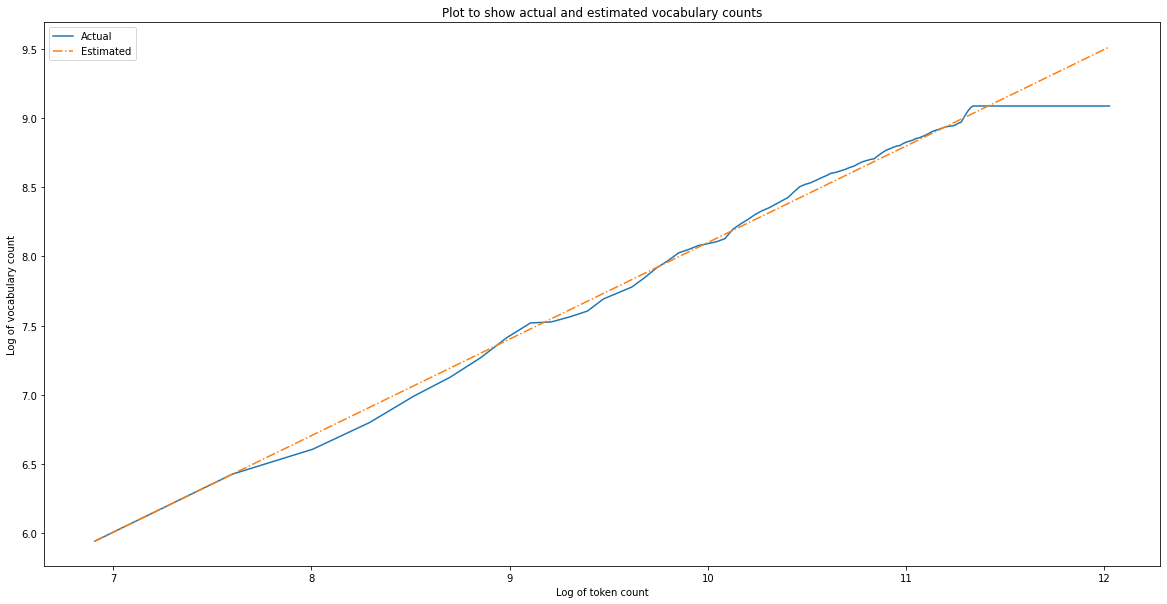

In [25]:
%pip install matplotlib  
import matplotlib.pyplot as plt

# plt.rcParams["figure.figsize"] = (20,10)

plt.plot(log_t, log_m, label = "Actual")
plt.plot(log_t, heaps_vocab_estimate, label = "Estimated", linestyle='dashdot')
plt.xlabel("Log of token count")
plt.ylabel("Log of vocabulary count")
plt.title("Plot to show actual and estimated vocabulary counts")

plt.legend()
plt.savefig("heaps190522.png") 


plt.show()

________________________________________________________
### Application of Heaps Law


In [26]:
import nltk
nltk.download('stopwords')
nltk.download('gutenberg')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hayagreev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Hayagreev\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords
#get the stop words for English

stop_words = set(stopwords.words('english'))

words_bryant = nltk.Text(nltk.corpus.gutenberg.words('bryant-stories.txt'))

words_emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))

#convert to small letters
words_bryant = [word.lower() for word in words_bryant if word.isalpha()]
words_emma = [word.lower() for word in words_emma if word.isalpha()]

#remove stop words
words_bryant = [word.lower() for word in words_bryant if word not in stop_words][:15000]
words_emma = [word.lower() for word in words_emma if word not in stop_words][:15000]

TTR_bryant = len(set(words_bryant))/len(words_bryant)
TTR_emma = len(set(words_emma))/len(words_emma)

print('Number of tokens, Vocabulary, Type-token ratio (Bryant stories) = ', len(words_bryant), len(set(words_bryant)), TTR_bryant)
print('Number of tokens, Vocabulary, Type-token ratio (Jane Austen Emma) = ', len(words_emma), len(set(words_emma)), TTR_emma)

Number of tokens, Vocabulary, Type-token ratio (Bryant stories) =  15000 2796 0.1864
Number of tokens, Vocabulary, Type-token ratio (Jane Austen Emma) =  15000 3274 0.21826666666666666



### According to Zipf's law, the frequency of the word is inversely proportional to its rank.
#### $$\begin{align}
f_w &\propto \frac{1}{r^{\alpha}} \\ 
f_w &= \kappa \frac{1}{r^{\alpha}}\\ 
f_w\times r^{\alpha} &= \kappa \end{align}$$

where $\kappa$ is a constant,  $f$ is the frequency of a word, and $r$ is its rank.
Here $\alpha$ is usually between 0.9 and 1.0
#

### Plotting the frequency and rank


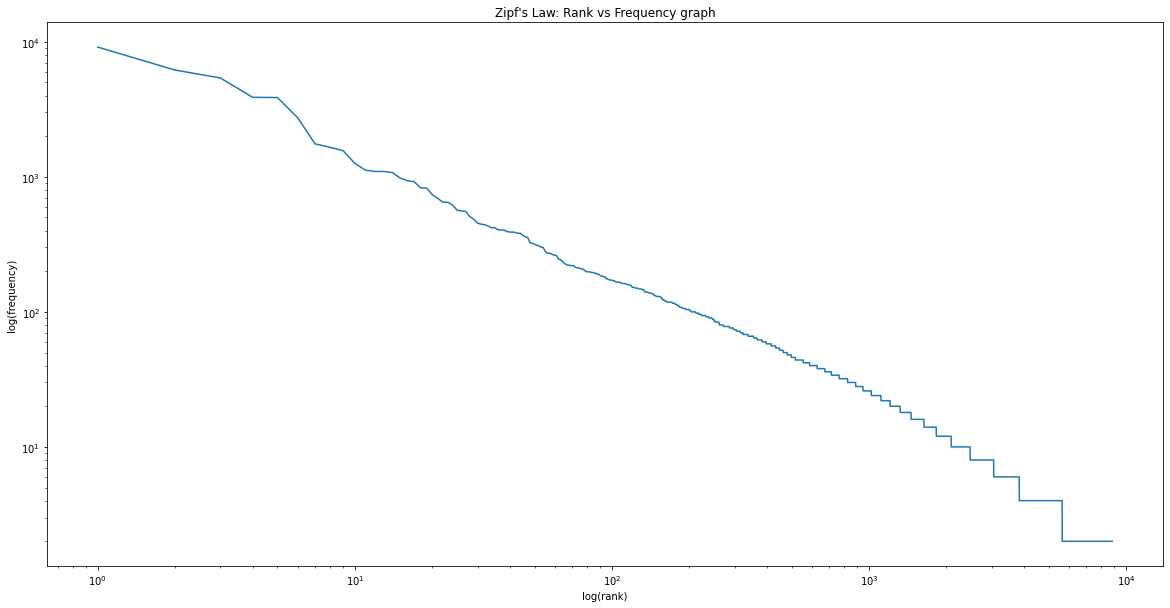

In [28]:
from operator import itemgetter
v = {}
for key, value in reversed(sorted(token_frequency.items(), key = itemgetter(1))):
    v[key] = value
    
# Plotting Zipf's Law
import matplotlib.pyplot as plt
import math

#Getting the values needed to plot
#You may use the RHS values in the plotting function directly
n = len(v.keys())
y = list(v.values())
x = list(range(1, n+1))
 
plt.plot(x, y)
 
#choosing log scale
plt.rcParams["figure.figsize"] = (20,10)

plt.yscale("log")
plt.xscale("log")

# naming the x axis
plt.ylabel('log(frequency)')
# naming the y axis
plt.xlabel('log(rank)')
 

plt.title("Zipf's Law: Rank vs Frequency graph")

#If you want to save the plot, use the next instruction
plt.savefig("zipfs190522.png") 

# function to show the plot
plt.show()


# Exercise 1
How do you estimate the $\alpha$ value using the frequency and rank?
Hint: $k$ is a constant :)

# Exercise 2
## Plot rank Vs frequency graph for atleast 3 languages, using the wiki content

### Term frequency


In [29]:
normalized_tf = {key: value/number_of_tokens for key, value in token_frequency.items()}
list(normalized_tf.items())[:15]

[('the', 0.05456369346883695),
 ('first', 0.0009076035683150817),
 ('step', 0.00011942152214672128),
 ('in', 0.023084180230961225),
 ('fighting', 8.359506550270489e-05),
 ('epidemic', 0.00011942152214672128),
 ('was', 0.005851654585189343),
 ('nationwide', 9.553721771737702e-05),
 ('lock', 2.3884304429344255e-05),
 ('down', 0.00011942152214672128),
 ('on', 0.0055053321709638515),
 ('march', 0.00023884304429344256),
 ('th', 0.000465743936372213),
 ('such', 0.001862975745488852),
 ('a', 0.016312979925242128)]

__________________________________________________
# Exercise 3
## Select and downdoad wiki dumps for three languages 
## Find the normalized frequency for words for all languages chosen
__________________________________________________


# Exercise 4
## Select and downdoad wiki dumps for three languages 
## Estmate the vocabulary of the each dump and verify whether they match with the actual vocabulay count using Heap's Law
__________________________________________________


# Preprocessing

In [30]:
fd = open(get_corpus_folder() + 'sample.txt', encoding='utf-8' )
sample_txt = fd.read()
sample_txt

'Viral Gene Compression: Complexity and Verification The smallest known biological organisms are, by far, the viruses. One of the unique adaptations that many viruses have aquired is the compression of the genes in their genomes. In this paper we study a formalized model of gene compression in viruses. Specifically, we define a set of constraints that describe viral gene compression strategies and investigate the properties of these constraints from the point of view of genomes as languages. We pay special attention to the finite case (representing real viral genomes) and describe a metric for measuring the level of compression in a real viral genome. An efficient algorithm for establishing this metric is given along with applications to real genomes including automated classification of viruses and prediction of horizontal gene transfer between host and virus. In contrast to the lengthy, often redundant, genomes of higher organisms, the genomes of viruses are extremely efficient in th

__________________________________________________
## Case folding

In [31]:
sample_txt.lower()

'viral gene compression: complexity and verification the smallest known biological organisms are, by far, the viruses. one of the unique adaptations that many viruses have aquired is the compression of the genes in their genomes. in this paper we study a formalized model of gene compression in viruses. specifically, we define a set of constraints that describe viral gene compression strategies and investigate the properties of these constraints from the point of view of genomes as languages. we pay special attention to the finite case (representing real viral genomes) and describe a metric for measuring the level of compression in a real viral genome. an efficient algorithm for establishing this metric is given along with applications to real genomes including automated classification of viruses and prediction of horizontal gene transfer between host and virus. in contrast to the lengthy, often redundant, genomes of higher organisms, the genomes of viruses are extremely efficient in th

____________
## Remove numbers

In [32]:
#remove numbers
import re
pp_text = re.sub(r'\d+', '', sample_txt.lower())

pp_text

'viral gene compression: complexity and verification the smallest known biological organisms are, by far, the viruses. one of the unique adaptations that many viruses have aquired is the compression of the genes in their genomes. in this paper we study a formalized model of gene compression in viruses. specifically, we define a set of constraints that describe viral gene compression strategies and investigate the properties of these constraints from the point of view of genomes as languages. we pay special attention to the finite case (representing real viral genomes) and describe a metric for measuring the level of compression in a real viral genome. an efficient algorithm for establishing this metric is given along with applications to real genomes including automated classification of viruses and prediction of horizontal gene transfer between host and virus. in contrast to the lengthy, often redundant, genomes of higher organisms, the genomes of viruses are extremely efficient in th

____________
## Tokenize

In [33]:
import nltk
#tokenize
tokens = nltk.word_tokenize(pp_text)
#tokens

__________________________________________________
## Lemmatization
### Uses context to convert word into a meaningful form :)

In [34]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4') # open multi-lingual wordnet
from nltk import WordNetLemmatizer

# Function to lemmatize the corpus and return lemmatized words (original and the lemmatized)
def lemmatizer(s):

    
    #Initialize the lemmatizer
    lemmatize = WordNetLemmatizer()
    
    #store the stemmed words in the dictionary
    lem_tokens = {}
    
    # Lemmatize all tokens
    for token in tokens:
        lem_token = lemmatize.lemmatize(token)
        if lem_token != token:
            lem_tokens[token] = lem_token
    return lem_tokens

lemmatized_tokens = lemmatizer(sample_txt)

# List N lemmatized tokens
list(lemmatized_tokens.items())[:15]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hayagreev\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hayagreev\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[('organisms', 'organism'),
 ('viruses', 'virus'),
 ('adaptations', 'adaptation'),
 ('genes', 'gene'),
 ('genomes', 'genome'),
 ('constraints', 'constraint'),
 ('strategies', 'strategy'),
 ('properties', 'property'),
 ('as', 'a'),
 ('languages', 'language'),
 ('applications', 'application'),
 ('possess', 'posse'),
 ('introns', 'intron'),
 ('systems', 'system'),
 ('types', 'type')]

__________________________________________________
## Stemming
### Algorithm to Remove suffixes

In [35]:
from nltk.stem import PorterStemmer

def stemmer(s):

    #initialize the Porter Stemmer
    ps = PorterStemmer()

    #store all the stemmed tokens in this dictionary
    stemmed_tokens = {}
    
    # stem all tokens
    for token in tokens:
        stemmed_token = ps.stem(token)
        if stemmed_token != token:
            stemmed_tokens[token] = stemmed_token
    return stemmed_tokens

stem_tokens = stemmer(tokens)

list(stem_tokens.items())[100:115]

[('basepairs', 'basepair'),
 ('compare', 'compar'),
 ('manages', 'manag'),
 ('encode', 'encod'),
 ('genes.we', 'genes.w'),
 ('techniques', 'techniqu'),
 ('terms', 'term'),
 ('language', 'languag'),
 ('satisfies', 'satisfi'),
 ('overlapping', 'overlap'),
 ('property', 'properti'),
 ('likewise', 'likewis'),
 ('encodings', 'encod'),
 ('focus', 'focu'),
 ('deterministic', 'determinist')]

______________________________
_________________________
# Day 2


______________________
##Vector space
### One Hot vector

In [27]:
# One-hot encoding
import numpy as np
vocab = sorted(list(set(tokens)))
print(len(vocab))
small_vocab = vocab[-200:-190]

#generate one-hot encoding
ohv_dict = {}
for i,token in enumerate(small_vocab):
    ohv_temp = np.zeros(len(small_vocab))
    ohv_temp[i] = 1
    ohv_dict[token] = ohv_temp
ohv_dict

703


{'provides': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'quantifiable': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'question': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'rare': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'reaches': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'read': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'reader': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'real': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'recall': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'recognizes': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

_________________________
##Cosine similarity
## Cosine similarity betweeen any two vectors $u$ and $v$ is defined as
 $$ \cos(\theta) = \dfrac{u.v}{{||u^2||\,||v^2||}}$$
 
 ### $\cos(\theta)$ decreases as the similarity between $u$ and  $u$ decreases


_______________
## Cosine Distance
## Cosine distance betweeen any two vectors $u$ and $v$ is defined as
$$ CD = 1 -  \dfrac{u.v}{{||u||\,||v||}}$$
 
### CD increases as the similarity between $u$ and  $u$ decreases

In [36]:
###### 
from scipy.spatial import distance
color1 = [255,255,255] # white
color2 = [255,0,0] # red
color3 = [255,144,0] # orange
color4 = [255,164,0] # lighter shade of orange
color5 = [0,0,255] # Blue
color6 = [0,255,0] # Green

print(distance.cosine(color1,color1)) # between white and white
print(distance.cosine(color1,color4)) # between white and lighter shade of orange
print(distance.cosine(color1,color2)) # between white and red
print(distance.cosine(color1,color3)) # between white and orange
print(distance.cosine(color1,color4)) # between white and lighter shade of orange

print(distance.cosine(color3,color4)) # between orange and lighter shade of orange
print(distance.cosine(color2,color5)) # between red and blue
print(distance.cosine(color2,color6)) # between red and green

0
0.20210448218137755
0.42264973081037416
0.21337571476754802
0.20210448218137755
0.0016510660689108558
1.0
1.0


______________________
# Contextual represetation using bigrams, trigrams, etc


In [29]:
from nltk.util import ngrams
txt = "the staff has undergone on-line 36-hour training course to become qualified in coronavirus infection treatment"
bigrams = nltk.ngrams(nltk.word_tokenize(txt),2) 
for bigram in bigrams: 
    print(bigram)

('the', 'staff')
('staff', 'has')
('has', 'undergone')
('undergone', 'on-line')
('on-line', '36-hour')
('36-hour', 'training')
('training', 'course')
('course', 'to')
('to', 'become')
('become', 'qualified')
('qualified', 'in')
('in', 'coronavirus')
('coronavirus', 'infection')
('infection', 'treatment')


_____________
## Trigrams


In [30]:
trigrams = nltk.ngrams(nltk.word_tokenize("the staff has undergone on-line 36-hour training course to become qualified in coronavirus infection treatment"),3)
for trigram in trigrams:
    print(trigram)

('the', 'staff', 'has')
('staff', 'has', 'undergone')
('has', 'undergone', 'on-line')
('undergone', 'on-line', '36-hour')
('on-line', '36-hour', 'training')
('36-hour', 'training', 'course')
('training', 'course', 'to')
('course', 'to', 'become')
('to', 'become', 'qualified')
('become', 'qualified', 'in')
('qualified', 'in', 'coronavirus')
('in', 'coronavirus', 'infection')
('coronavirus', 'infection', 'treatment')


_____________
# Exercise for Day 2
## 1. What is length of the OneHot Vector if the vocabulary size was 10000
## 2. Consider any small corpus having ~10 sentences. Write a Python program to create a co-occurence matrix
## 3. Take the same corpus as above and create a co-occurence matrix using bigrams after removing stop words. 
##    Make sure that you have only English words in the pre-processed corpus. Find the vocabulary of the pre-processed 
##    corpus. Unigrams represent the vocabuly. 
##    Create a co-occurence matrix using bigrams columns and unigrams as rows. If a unigram was present in a bigram, then 
##    add 1 to the existing value (if any).

# COALS DEMO code

In [13]:
!pip install tqdm
!pip install pandas
import pandas as pd
from tqdm import tqdm
def coals_svd_50(tokens):
    '''
    Computing the COALS-SVD with vector size 50. First calculate the cooccurence matrix,
    then find the correlation matrix, make negative values zero, and compute square root.
    Then compute SVD and reconstruct with vector size 50.
    '''
    # freq, vocab = get_freq_vocab(tokens)
    #for n, i in enumerate(freq.items()):
    #    if i[0]=='patient':
    #        break
    vocab = set(tokens)
    vocab_dict = {word: i for i, word in enumerate(vocab)}
    # vocab_open_14k_dict = {word: i for i, word in enumerate(vocab[n:14000+n])}
    vocab = set(vocab_dict.keys())
    #vocab_open_14k = set(vocab_open_14k_dict.keys())

    tokens_size = len(tokens)
    
    coocc_mat = np.zeros((len(vocab), len(vocab)), dtype = 'float64')
    for n, token in tqdm(enumerate(tokens)):
        if token in vocab:
            if n-4 < 0:
                ramp = 5-n
            else:
                ramp = 1
            for context in tokens[max(0,n-4):n]:
                if context in vocab:
                    coocc_mat[vocab_dict[token], vocab_dict[context]] += ramp
                ramp += 1
            ramp = 4
            for context in tokens[n+1:min(n+5, tokens_size)]:
                if context in vocab:
                    coocc_mat[vocab_dict[token], vocab_dict[context]] += ramp
                ramp -= 1
    corr_mat = np.zeros_like(coocc_mat)
    T = np.sum(coocc_mat)
    t1 = np.sum(coocc_mat, axis = 1)
    t2 = np.sum(coocc_mat, axis = 0)
    for i in tqdm(range(coocc_mat.shape[0])):
        for j in range(coocc_mat.shape[1]):
            if np.sqrt(t1[i]*t2[j]*(T-t1[i])*(T-t2[j])) == 0:
                corr_mat[i,j] = 0
            else:
                corr_mat[i,j] = (T*coocc_mat[i,j] - t1[i]*t2[j])/np.sqrt(t1[i]*t2[j]*(T-t1[i])*(T-t2[j]))
    
    corr_mat = np.where(corr_mat < 0, 0, corr_mat)
    corr_mat = np.sqrt(corr_mat)

    df = pd.DataFrame(corr_mat, index = vocab_dict, columns = vocab_dict)

    print('Computing SVD of the COALS matrix')
    coals_svd = np.linalg.svd(corr_mat, full_matrices=False)
    U, s, V = coals_svd
    word_embedding_mat = coocc_mat @ V[:50, :].T @ np.linalg.inv(np.diag(s[:50]))

    return word_embedding_mat

## SVD demonstration
## Dimensionality reduction

## Demonstrtion of dimensionality reduction using an image

(768, 1024)


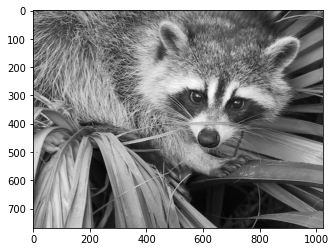

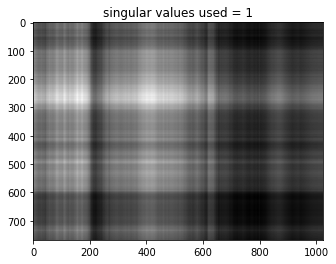

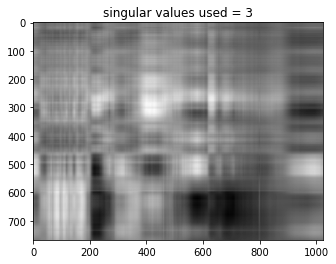

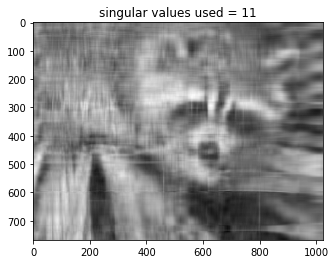

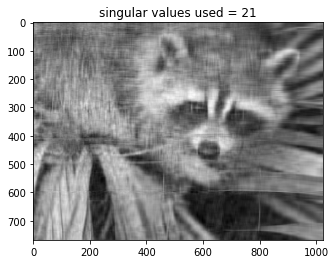

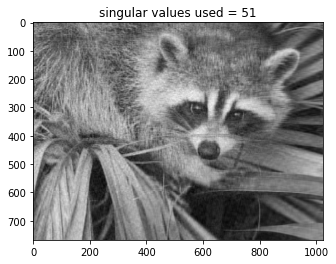

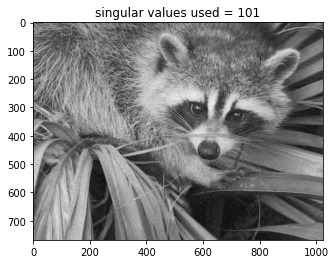

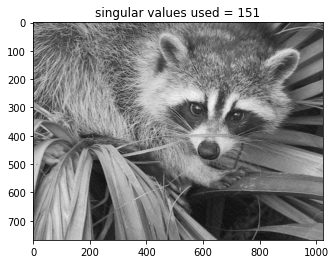

In [2]:
import scipy.misc as s
import pylab
from scipy import fftpack, ndimage
import matplotlib.pyplot as plt
import numpy as np

x = s.face(gray=True)
print(x.shape)
plt.imshow(x, cmap='gray')
plt.show()
U,S,V = np.linalg.svd(x, full_matrices=False)
for i in  (0,2,10,20,50,100,150):
    new_image = np.matrix(U[:, :i+1]) * np.diag(S[:i+1]) * np.matrix(V[:i+1, :])
    plt.imshow(new_image, cmap='gray')
    title = "singular values used = %s" % (i+1)
    plt.title(title)
    plt.show()

In [14]:
svd = coals_svd_50(tokens)
svd

3541it [00:00, 153924.60it/s]
100%|███████████████████████████████████████████████████████████████████████████████| 663/663 [00:01<00:00, 356.82it/s]


Computing SVD of the COALS matrix


array([[-1.13599324,  0.52655566, -0.10802236, ...,  0.83727595,
         1.24743018, -0.12943979],
       [-0.20807859,  0.14189067,  0.16941954, ..., -0.7238961 ,
         0.07365152, -0.46058043],
       [-0.28401371, -0.55205964, -0.0308012 , ...,  0.24996594,
         0.45229637,  0.24151885],
       ...,
       [-0.33600934, -0.02030074,  0.05835891, ..., -0.00327922,
        -0.05603884,  0.12224295],
       [-0.46750321,  0.0388886 ,  0.45227062, ...,  0.00880986,
        -0.28855644, -0.12022677],
       [-1.25653741,  0.53384688,  0.07617673, ...,  0.40554269,
         1.82562285,  0.74511651]])